### Customization
Install popular visualization library seaborn on the compute instance and plot sample chart.

In [2]:
!pip install seaborn

You should consider upgrading via the 'pip install --upgrade pip' command.


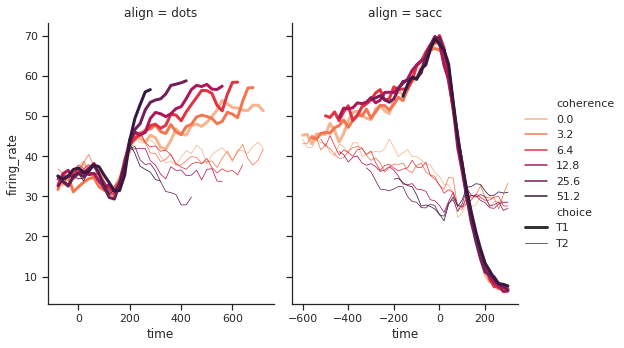

In [11]:
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")

dots = sns.load_dataset("dots")
palette = dict(zip(dots.coherence.unique(),
                   sns.color_palette("rocket_r", 6)))
sns.relplot(x="time", y="firing_rate",
            hue="coherence", size="choice", col="align",
            size_order=["T1", "T2"], palette=palette,
            height=5, aspect=.75, facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots)

### Connect to Azure ML workspace using integrated authentication

In [7]:
from azureml.core.workspace import Workspace
ws = Workspace.from_config()

### Submit distributed job to shared GPU cluster
Train DNN on NVidia-V100 GPU cluster.

In [ ]:
!python /maxluk/pytorch_horovod_mnist.py --datapath foo

In [8]:
from azureml.train.dnn import PyTorch, Mpi

estimator = PyTorch(source_directory='.',
                    entry_script='pytorch_horovod_mnist.py',
                    compute_target = ws.compute_targets['v100-cluster'],
                    node_count=2,
                    distributed_training=Mpi(),
                    framework_version = '1.2')

In [9]:
from azureml.core import Experiment, Run
experiment = Experiment(ws, name='pytorch-distributed-training')

run = experiment.submit(estimator)
print(run)

Run(Experiment: pytorch-distributed-training,
Id: pytorch-distributed-training_1572899401_cb10e259,
Type: azureml.scriptrun,
Status: Starting)


### Monitor experiment run

In [ ]:
from azureml.widgets import RunDetails

RunDetails(run).show()

### Monitor metrics in Tensorboard
Launch Tensorboard for already completed run.

In [ ]:
from azureml.tensorboard import Tensorboard
from azureml.core import Run

completed_run = Run(exp, 'pytorch-distributed-training_1570693007_3299e514')
tb = Tensorboard([completed_run])
tb.start()